# Ecuaciones Diferenciales Ordinarias con Condiciones de Frontera

In [136]:
# Paquetes
import numpy as np
import matplotlib.pyplot as plt

In [140]:
L = 10
hp = 0.01
h = 2
Ta = 20
T0 = 40
TN = 200

## 1. Método de Shooting

In [69]:
# definimos la función f(x) para la pendiente y la condición inicial:

def f1(z_val): return z_val
def f2(T_val): return -he*(Ta-T_val)

In [91]:
# Método de shooting con RK4
z0_guess = np.linspace(1,20,1000)
x = np.linspace(0,L,20)
h = x[1] - x[0]
threshold = 0.1
for z0 in z0_guess:
    z, T = [], []
    z_prev, T_prev = z0, T0
    z.append(z_prev)
    T.append(T_prev)

    for i in range(1,len(x)):
        k1_1 = f1(z_prev)
        k1_2 = f2(T_prev)
    
        T_inter = T_prev + 0.5*k1_1*h
        z_inter = z_prev + 0.5*k1_2*h
        k2_1 = f1(z_inter)
        k2_2 = f2(T_inter)
    
        T_inter = T_prev + 0.5*k2_1*h
        z_inter = z_prev + 0.5*k2_2*h
        k3_1 = f1(z_inter)
        k3_2 = f2(T_inter)
    
        T_inter = T_prev + k3_1*h
        z_inter = z_prev + k3_2*h
        k4_1 = f1(z_inter)
        k4_2 = f2(T_inter)
    
        phi1 = (1/6)*(k1_1 + 2*k2_1 + 2*k3_1 + k4_1)
        phi2 = (1/6)*(k1_2 + 2*k2_2 + 2*k3_2 + k4_2)
    
        T_new = T_prev + phi1*h
        z_new = z_prev + phi2*h
    
        z.append(z_new)
        T.append(T_new)
    
        z_prev = z_new
        T_prev = T_new
    if np.abs(T[19] - T10) <= threshold: 
        print(z0)
        break

12.696696696696698


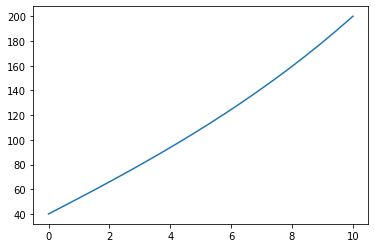

In [92]:
plt.plot(x,T)

## 2. Aproximación con Diferencias Finitas

Con la aproximación en diferencias finitas centradas, la ecuación de transferencia de calor,

\begin{equation}
\frac{d^{2}T}{dx^{2}} = -h_p(T_{a}-T),
\end{equation}

se convierte en

\begin{equation}
T_{i+1}-(2+h_p h^2)T_i+T_{i-1}=-h_p h^2 T_a,
\end{equation}

donde el subindice $i=1,...,N-1$. Las condiciones de frontera son $T_0$ y $T_N$

In [288]:
L = 10
hp = 0.01
Ta = 20
T0 = 40
TN = 200

In [298]:
N = 100 # Número de puntos en el dominio de x para calcular T

x = np.linspace(0,L,N+2)
h = x[1] - x[0]

b = np.zeros(N)
A = np.zeros((N,N))
for i in range(N):
    if i == 0:
        A[i,i] = -(2 + hp*h**2)
        A[i,i+1] = 1
        b[i] = -hp*h**2*Ta-T0
        continue
    elif i == N-1:
        A[i,i] = -(2 + hp*h**2)
        A[i,i-1] = 1
        b[i] = -hp*h**2*Ta-TN
        continue
    A[i,i] = -(2 + hp*h**2)
    A[i,i+1] = 1
    A[i,i-1] = 1
    b[i] = -hp*h**2*Ta

A = np.matrix(A)
b = np.matrix(b).T

T = (A**-1)*b
T = np.array(T.T)
T = np.insert(T,0,T0)
T = np.insert(T,N+1,TN)

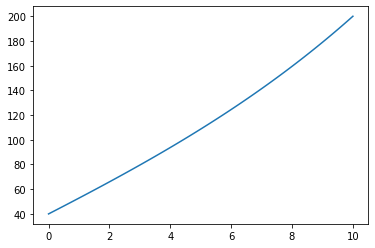

In [299]:
plt.plot(x,T)